### 1. Import Dependencies

In [244]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [245]:
pd.set_option('display.max_rows', None)

In [246]:
pd.set_option('display.max_column', None)

In [247]:
pd.reset_option('display.max_rows')

In [248]:
pd.reset_option('display.max_columns')

### 2. Read the Dataset

In [249]:
df = pd.read_csv(r"D:\Study\Model X\Dementia Prediction\Dataset\Processed\Feature_Eliminated.csv")
df.head()

,BIRTHMO,BIRTHYR,SEX,HISPANIC,HISPOR,RACE,RACESEC,RACETER,PRIMLANG,EDUC,...,PTSD,BIPOLAR,SCHIZ,DEP2YRS,DEPOTHR,ANXIETY,OCD,NPSYDEV,PSYCDIS,DEMENTED
0,5,1952,1,0,88,1,88,88,1,16,...,0,0,0,0,0,1,0,9,0,0
1,5,1952,1,0,88,1,88,88,1,16,...,-4,-4,-4,-4,-4,-4,-4,-4,-4,0
2,12,1956,1,0,88,1,88,88,1,16,...,0,0,0,0,0,0,0,0,0,0
3,1,1958,2,1,1,1,88,88,2,16,...,9,9,9,9,9,9,9,9,9,1
4,2,1945,1,1,1,1,88,88,1,12,...,0,0,0,0,0,0,0,0,0,0


### 3. Handling Missing Values

#### 3.1 Check Missing values

In [250]:
# Count missing values in each column
missing_counts = df.isnull().sum()

In [251]:
# Filter columns with missing values > 0
missing_cols = missing_counts[missing_counts > 0]

In [252]:
print("Columns with missing values and their counts:")
print(missing_cols)

Columns with missing values and their counts:
Series([], dtype: int64)


#### 3.2 Check numeric values assigned for NULL Values

In [253]:
for col in df.columns:
    print(col, df[col].unique())

BIRTHMO [ 5 12  1  2  7  8 10 11  3  6  9  4]
BIRTHYR [1952 1956 1958 1945 1942 1936 1949 1957 1951 1950 1947 1948 1963 1959
 1938 1953 1941 1940 1971 1930 1954 1939 1946 1944 1973 1960 1962 1965
 1943 1964 1934 1937 1935 1928 2000 1955 1975 1969 1961 1974 1933 1976
 1978 1967 1984 1972 1966 1981 1970 1929 1990 1968 1931 1992 1979 1932
 1993 1926 1980 1920 1985 1921 1986 1927 1925 2002 1977 1991 1919 1989
 1983 1913 1924 1982 1923 1987 1918 1917 1922 1995 1994 1914 2003 1999
 1988 1915 1916 1912 1910 1911 1907 1996 1909 1998 1997 2001 2004 1908
 1906 1905 1901 1902 1896 1904 2005 1903]
SEX [1 2]
HISPANIC [0 1 9]
HISPOR [88  1 99  2 50  5  6  3  4]
RACE [ 1 99  3 50  5  2  4]
RACESEC [88  3 50 99  4  2  1  5]
RACETER [88 50 99  2  1  3  5  4]
PRIMLANG [1 2 8 3 6 4 9 5]
EDUC [16 12  7 20 18 14  9  6 11 13  1 17 19 15  4  3  8 99  5 10  0  2 25 24
 22 21 26 27 30 23 28 31 29]
MARISTAT [1 3 5 6 2 4 9]
NACCLIVS [4 2 1 3 5 9]
INDEPEND [1 2 3 4 9]
RESIDENC [1 2 9 3 4]
HANDED [2 1 3 9]
NACCAGE

In [254]:
missing_codes = [-4, 9, 99, 999, 9999, 8, 88, 888, 8888]

In [255]:
# Replaceing missing codes with NaN
df = df.replace(missing_codes, np.nan)

Now check what are missing value columns

In [256]:
missing_counts = df.isnull().sum()
missing_cols = missing_counts[missing_counts > 0]
print("Columns with missing values and their counts:")
print(missing_cols)

Columns with missing values and their counts:
BIRTHMO      34276
HISPANIC       677
HISPOR      181905
RACE           832
RACESEC     189941
             ...  
DEPOTHR      73391
ANXIETY     175776
OCD         175778
NPSYDEV     175836
PSYCDIS      72117
Length: 90, dtype: int64


Check the correlation with the Target variable to decide before handling missing values

In [257]:
# Fill missing values temporarily for correlation calculation
# For numeric columns, fill NaN with 0
df_numeric = df.select_dtypes(include=[np.number])
df_filled = df_numeric.fillna(0)

# Compute correlation with the target
correlation_with_target = df_filled.corr()['DEMENTED'].sort_values(ascending=False)

print("Correlation of columns with DEMENTED:")
print(correlation_with_target)

Correlation of columns with DEMENTED:
DEMENTED    1.000000
INDEPEND    0.726380
NACCLIVS    0.296222
RESIDENC    0.232631
DEP2YRS     0.185879
              ...   
BIRTHYR    -0.099311
MARISTAT   -0.112131
INRELTO    -0.130303
EDUC       -0.135994
INVISITS   -0.143950
Name: DEMENTED, Length: 93, dtype: float64


In [258]:
df.shape

(195196, 93)

Before handling, check the how some critical symptos which can mostly relate to Dementia

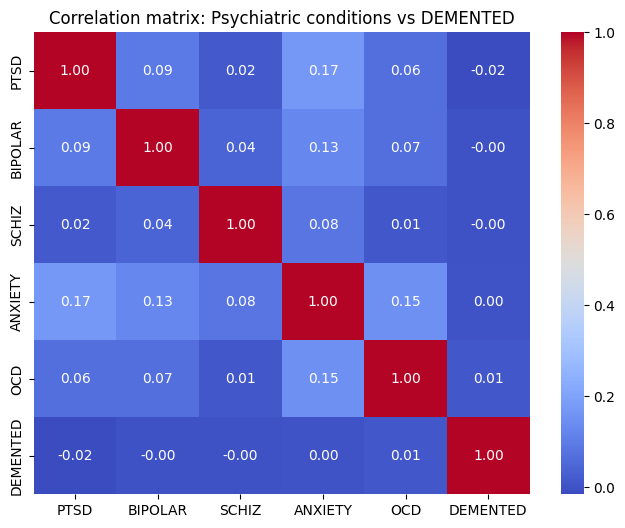

In [ ]:
# Select relevant columns
cols = ['PTSD', 'BIPOLAR', 'SCHIZ', 'ANXIETY', 'OCD', 'DEMENTED']
df_subset = df[cols]

# Fill missing with 0 (assume missing = absent) for correlation only
df_corr = df_subset.fillna(0).corr()

# Plot correlation matrix
plt.figure(figsize=(8,6))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation matrix: Psychiatric conditions vs DEMENTED')
plt.show()

##### 3.1.2 Handle most-null-valued columns

In [260]:
threshold = 0.8  # 80%
missing_counts = df.isna().sum()
cols_to_drop = missing_counts[missing_counts > threshold * len(df)].index

In [261]:
df = df.drop(columns=cols_to_drop)
print(f"Dropped columns ({len(cols_to_drop)}):\n", cols_to_drop)

Dropped columns (39):
 Index(['HISPOR', 'RACESEC', 'RACETER', 'INKNOWN', 'ALCOCCAS', 'ALCFREQ',
       'HATTMULT', 'HATTYEAR', 'CVPACDEF', 'CVANGINA', 'CVHVALVE', 'STROKMUL',
       'NACCSTYR', 'TIAMULT', 'NACCTIYR', 'PDYR', 'PDOTHRYR', 'TBI',
       'TBIBRIEF', 'TBIEXTEN', 'TBIWOLOS', 'TBIYEAR', 'DIABTYPE', 'ARTHRIT',
       'ARTHTYPE', 'ARTHUPEX', 'ARTHLOEX', 'ARTHSPIN', 'ARTHUNK', 'APNEA',
       'RBD', 'INSOMN', 'OTHSLEEP', 'PTSD', 'BIPOLAR', 'SCHIZ', 'ANXIETY',
       'OCD', 'NPSYDEV'],
      dtype='object')


Cheking the missing cols now

In [262]:
missing_counts = df.isnull().sum()
missing_cols = missing_counts[missing_counts > 0]
print("Columns with missing values and their counts:")
print(missing_cols)

Columns with missing values and their counts:
BIRTHMO      34276
HISPANIC       677
RACE           832
PRIMLANG      3032
EDUC          3869
MARISTAT       896
NACCLIVS       324
INDEPEND       597
RESIDENC      2878
HANDED        1032
NACCAGE       3596
NACCAGEB      1636
NACCNIHR      2559
NEWINF       58060
INRELTO       8288
INLIVWTH      8288
INVISITS    120391
INCALLS     120391
INRELY        8288
TOBAC30      72160
TOBAC100     72924
SMOKYRS      76680
PACKSPER     75466
QUITSMOK    146678
CVHATT       72060
CVAFIB       72261
CVANGIO      71888
CVBYPASS     71863
CVPACE       91373
CVCHF        72017
CVOTHR       72173
CBSTROKE     72131
CBTIA        72822
PD           72052
PDOTHR       72149
SEIZURES     72202
TRAUMBRF     92266
TRAUMEXT     91960
TRAUMCHR     91756
DIABETES     72087
HYPERTEN     72089
HYPERCHO     72800
B12DEF       73956
THYROID      72569
INCONTU      72012
INCONTF      71997
ALCOHOL      72076
ABUSOTHR     72021
DEP2YRS      72802
DEPOTHR      73391
PSYC

Calculate missing percentage

In [263]:
# Calculate missing percentages
total_rows = len(df)
missing_pct = (df.isna().sum() / total_rows * 100).sort_values(ascending=False)

print("Missingness percentages for remaining variables:")
print(missing_pct)

Missingness percentages for remaining variables:
QUITSMOK    75.143958
INCALLS     61.676981
INVISITS    61.676981
TRAUMBRF    47.268387
TRAUMEXT    47.111621
TRAUMCHR    47.007111
CVPACE      46.810898
SMOKYRS     39.283592
PACKSPER    38.661653
B12DEF      37.888071
DEPOTHR     37.598619
TOBAC100    37.359372
CBTIA       37.307117
DEP2YRS     37.296871
HYPERCHO    37.295846
THYROID     37.177504
CVAFIB      37.019714
SEIZURES    36.989487
CVOTHR      36.974631
TOBAC30     36.967971
PDOTHR      36.962335
CBSTROKE    36.953114
PSYCDIS     36.945942
HYPERTEN    36.931597
DIABETES    36.930572
ALCOHOL     36.924937
CVHATT      36.916740
PD          36.912642
ABUSOTHR    36.896760
CVCHF       36.894711
INCONTU     36.892149
INCONTF     36.884465
CVANGIO     36.828624
CVBYPASS    36.815816
NEWINF      29.744462
BIRTHMO     17.559786
INLIVWTH     4.245989
INRELTO      4.245989
INRELY       4.245989
EDUC         1.982110
NACCAGE      1.842251
PRIMLANG     1.553311
RESIDENC     1.474415
NACCN

#### 3.1.3 Remove still High precentage missing values which are less related to target variable

In [264]:
features = [
    'QUITSMOK', 'INCALLS', 'INVISITS', 'TRAUMBRF', 'TRAUMEXT', 'TRAUMCHR', 'CVPACE',
    'SMOKYRS', 'PACKSPER', 'B12DEF', 'DEPOTHR', 'TOBAC100', 'CBTIA', 'DEP2YRS',
    'HYPERCHO', 'THYROID', 'CVAFIB', 'SEIZURES', 'CVOTHR', 'TOBAC30', 'PDOTHR',
    'CBSTROKE', 'PSYCDIS', 'HYPERTEN', 'DIABETES', 'ALCOHOL', 'CVHATT', 'PD',
    'ABUSOTHR', 'CVCHF', 'INCONTU', 'INCONTF', 'CVANGIO', 'CVBYPASS', 'NEWINF', 'BIRTHMO'
]

# Include the target variable
selected_cols = features + ['DEMENTED']


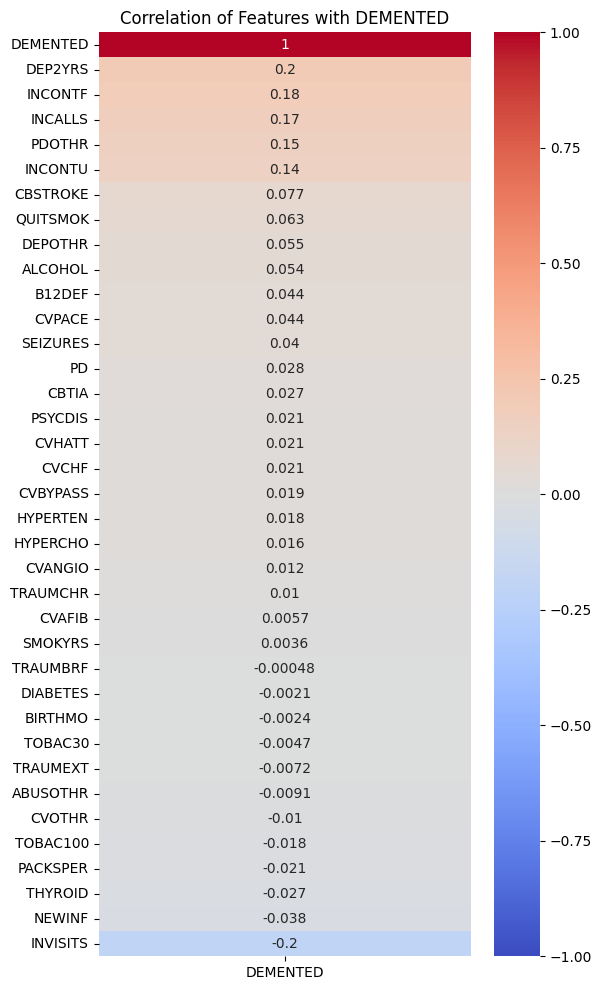

In [265]:
# Compute correlation with the target
corr_matrix = df[selected_cols].corr()
target_corr = corr_matrix[['DEMENTED']].sort_values(by='DEMENTED', ascending=False)

# Quick heatmap
plt.figure(figsize=(6,12))
sns.heatmap(target_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation of Features with DEMENTED')
plt.show()

In [266]:
"""
    QUITSMOK    75.143958
    INCALLS     61.676981
    INVISITS    61.676981
    TRAUMBRF    47.268387
    TRAUMEXT    47.111621
    TRAUMCHR    47.007111
    NEWINF      29.744462
    
"""

'\n    QUITSMOK    75.143958\n    INCALLS     61.676981\n    INVISITS    61.676981\n    TRAUMBRF    47.268387\n    TRAUMEXT    47.111621\n    TRAUMCHR    47.007111\n    NEWINF      29.744462\n\n'

In [267]:
cols_to_drop = [
    'QUITSMOK',
    'INCALLS',
    'INVISITS',
    'TRAUMBRF',
    'TRAUMEXT',
    'TRAUMCHR',
    'NEWINF'
]

In [268]:
df = df.drop(columns=cols_to_drop)

In [269]:
# Calculate missing percentages
total_rows = len(df)
missing_pct = (df.isna().sum() / total_rows * 100).sort_values(ascending=False)

print("Missingness percentages for remaining variables:")
print(missing_pct)

Missingness percentages for remaining variables:
CVPACE      46.810898
SMOKYRS     39.283592
PACKSPER    38.661653
B12DEF      37.888071
DEPOTHR     37.598619
TOBAC100    37.359372
CBTIA       37.307117
DEP2YRS     37.296871
HYPERCHO    37.295846
THYROID     37.177504
CVAFIB      37.019714
SEIZURES    36.989487
CVOTHR      36.974631
TOBAC30     36.967971
PDOTHR      36.962335
CBSTROKE    36.953114
PSYCDIS     36.945942
HYPERTEN    36.931597
DIABETES    36.930572
ALCOHOL     36.924937
CVHATT      36.916740
PD          36.912642
ABUSOTHR    36.896760
CVCHF       36.894711
INCONTU     36.892149
INCONTF     36.884465
CVANGIO     36.828624
CVBYPASS    36.815816
BIRTHMO     17.559786
INRELTO      4.245989
INRELY       4.245989
INLIVWTH     4.245989
EDUC         1.982110
NACCAGE      1.842251
PRIMLANG     1.553311
RESIDENC     1.474415
NACCNIHR     1.310990
NACCAGEB     0.838132
HANDED       0.528699
MARISTAT     0.459026
RACE         0.426238
HISPANIC     0.346831
INDEPEND     0.305846
NACCL

In [270]:
df.columns

Index(['BIRTHMO', 'BIRTHYR', 'SEX', 'HISPANIC', 'RACE', 'PRIMLANG', 'EDUC',
       'MARISTAT', 'NACCLIVS', 'INDEPEND', 'RESIDENC', 'HANDED', 'NACCAGE',
       'NACCAGEB', 'NACCNIHR', 'INRELTO', 'INLIVWTH', 'INRELY', 'TOBAC30',
       'TOBAC100', 'SMOKYRS', 'PACKSPER', 'CVHATT', 'CVAFIB', 'CVANGIO',
       'CVBYPASS', 'CVPACE', 'CVCHF', 'CVOTHR', 'CBSTROKE', 'CBTIA', 'PD',
       'PDOTHR', 'SEIZURES', 'DIABETES', 'HYPERTEN', 'HYPERCHO', 'B12DEF',
       'THYROID', 'INCONTU', 'INCONTF', 'ALCOHOL', 'ABUSOTHR', 'DEP2YRS',
       'DEPOTHR', 'PSYCDIS', 'DEMENTED'],
      dtype='object')

#### 3.2 Handle Binary missing values

In [271]:

binary_cols = []

# Loop through all columns
for col in df.columns:
    unique_vals = df[col].dropna().unique()  # drop NaNs
    if len(unique_vals) == 2:
        binary_cols.append(col)

print("Binary cols:", binary_cols)

Binary cols: ['SEX', 'HISPANIC', 'INLIVWTH', 'INRELY', 'TOBAC30', 'TOBAC100', 'PD', 'PDOTHR', 'DEP2YRS', 'DEPOTHR', 'DEMENTED']


In [272]:
# Check columns with missing values
missing_counts = df.isnull().sum()

# Filter columns that have at least one missing value
missing_cols = missing_counts[missing_counts > 0].index.tolist()

print("Columns with missing values:")
print(missing_cols)

Columns with missing values:
['BIRTHMO', 'HISPANIC', 'RACE', 'PRIMLANG', 'EDUC', 'MARISTAT', 'NACCLIVS', 'INDEPEND', 'RESIDENC', 'HANDED', 'NACCAGE', 'NACCAGEB', 'NACCNIHR', 'INRELTO', 'INLIVWTH', 'INRELY', 'TOBAC30', 'TOBAC100', 'SMOKYRS', 'PACKSPER', 'CVHATT', 'CVAFIB', 'CVANGIO', 'CVBYPASS', 'CVPACE', 'CVCHF', 'CVOTHR', 'CBSTROKE', 'CBTIA', 'PD', 'PDOTHR', 'SEIZURES', 'DIABETES', 'HYPERTEN', 'HYPERCHO', 'B12DEF', 'THYROID', 'INCONTU', 'INCONTF', 'ALCOHOL', 'ABUSOTHR', 'DEP2YRS', 'DEPOTHR', 'PSYCDIS']


In [273]:
# Select only columns that are binary (0/1) among missing value cols
binary_missing_cols = [c for c in missing_cols if df[c].dropna().isin([0,1]).all()]

# Remove target if present
binary_missing_cols = [c for c in binary_missing_cols if c != 'DEMENTED']

binary_missing_cols

['HISPANIC',
 'INLIVWTH',
 'INRELY',
 'TOBAC30',
 'TOBAC100',
 'PD',
 'PDOTHR',
 'DEP2YRS',
 'DEPOTHR']

In [274]:
# Fill missing values in binary columns with mode safely
for col in binary_missing_cols:
    mode_value = df[col].mode()[0]
    df[col] = df[col].fillna(mode_value)

#### 3.3 Handle numerical missing values

In [275]:
numerical_cols = ['BIRTHMO', 'BIRTHYR', 'EDUC', 'NACCAGE', 'NACCAGEB', 'NACCNIHR', 'SMOKYRS', 'PACKSPER']

# Check data types
print(df[numerical_cols].dtypes)

BIRTHMO     float64
BIRTHYR       int64
EDUC        float64
NACCAGE     float64
NACCAGEB    float64
NACCNIHR    float64
SMOKYRS     float64
PACKSPER    float64
dtype: object


In [276]:
for col in numerical_cols:
    median_value = df[col].median()
    df[col] = df[col].fillna(median_value)

#### 3.3 Handle categorical missing values

In [277]:
categorical_cols = [c for c in missing_cols if c not in binary_missing_cols + numerical_cols + ['DEMENTED']]
print(categorical_cols)

['RACE', 'PRIMLANG', 'MARISTAT', 'NACCLIVS', 'INDEPEND', 'RESIDENC', 'HANDED', 'INRELTO', 'CVHATT', 'CVAFIB', 'CVANGIO', 'CVBYPASS', 'CVPACE', 'CVCHF', 'CVOTHR', 'CBSTROKE', 'CBTIA', 'SEIZURES', 'DIABETES', 'HYPERTEN', 'HYPERCHO', 'B12DEF', 'THYROID', 'INCONTU', 'INCONTF', 'ALCOHOL', 'ABUSOTHR', 'PSYCDIS']


In [278]:
for col in categorical_cols:
    mode_value = df[col].mode()[0]
    df[col] = df[col].fillna(mode_value)

#### 3.4 Chech if there's any remaining misiing values

In [279]:
# Check for any remaining null values
remaining_nulls = df.isnull().sum()
remaining_nulls = remaining_nulls[remaining_nulls > 0]

if remaining_nulls.empty:
    print("No more missing values in the dataset.")
else:
    print("Columns with remaining missing values:")
    print(remaining_nulls)

No more missing values in the dataset.


In [280]:
df.to_csv("D:\Study\Model X\Dementia Prediction\Dataset\processed/Missing_Values_Handled.csv", index=False)